### Load libraries

In [1]:
import os, shutil

### Path for original dataset

In [2]:
original_data_dir_inf = '/home/enock/Documents/Tensorflow_Keras_projects/cell_images/Parasitized'

In [3]:
original_data_dir_uni = '/home/enock/Documents/Tensorflow_Keras_projects/cell_images/Uninfected'

### Path for data splits

In [4]:
data_dir = '/home/enock/Documents/Tensorflow_Keras_projects/malaria_dataset/'
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

### Create data split directories 

In [5]:
train_dir = os.path.join(data_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(data_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

test_dir = os.path.join(data_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

#### Training directory

In [6]:
### training directories for infected and uninfected
train_infected_dir = os.path.join(train_dir, 'infected')
if not os.path.exists(train_infected_dir):
    os.mkdir(train_infected_dir)

train_uninfected_dir = os.path.join(train_dir, 'uninfected')
if not os.path.exists(train_uninfected_dir):
    os.mkdir(train_uninfected_dir)

#### Validation directory

In [7]:
### validation directories for infected and uninfected
validation_infected_dir = os.path.join(validation_dir, 'infected')
if not os.path.exists(validation_infected_dir):
    os.mkdir(validation_infected_dir)

validation_uninfected_dir = os.path.join(validation_dir, 'uninfected')
if not os.path.exists(validation_uninfected_dir):
    os.mkdir(validation_uninfected_dir)

#### Test directory

In [8]:
### test directories for infected and uninfected
test_infected_dir = os.path.join(test_dir, 'infected')
if not os.path.exists(test_infected_dir):
    os.mkdir(test_infected_dir)

test_uninfected_dir = os.path.join(test_dir, 'uninfected')
if not os.path.exists(test_uninfected_dir):
    os.mkdir(test_uninfected_dir)

### Copy images to training, validation and test directories

In [9]:
### copy infected images to train directory
images = ['infected{}.png'.format(i) for i in range(9921)]
for img in images:
    img_src = os.path.join(original_data_dir_inf, img)
    img_dst = os.path.join(train_infected_dir, img)
    shutil.copyfile(img_src, img_dst)

### copy uninfected images to validation directory
images = ['infected{}.png'.format(i) for i in range(9921, 11023)]
for img in images:
    img_src = os.path.join(original_data_dir_inf, img)
    img_dst = os.path.join(validation_infected_dir, img)
    shutil.copyfile(img_src, img_dst)

### copy infected images to test directory
images = ['infected{}.png'.format(i) for i in range(11023, 13779)]
for img in images:
    img_src = os.path.join(original_data_dir_inf, img)
    img_dst = os.path.join(test_infected_dir, img)
    shutil.copyfile(img_src, img_dst)

In [10]:
### copy uninfected images to train directory
images = ['uninfected{}.png'.format(i) for i in range(9921)]
for img in images:
    img_src = os.path.join(original_data_dir_uni, img)
    img_dst = os.path.join(train_uninfected_dir, img)
    shutil.copyfile(img_src, img_dst)
    
### copy uninfected images to validation directory
images = ['uninfected{}.png'.format(i) for i in range(9921, 11023)]
for img in images:
    img_src = os.path.join(original_data_dir_uni, img)
    img_dst = os.path.join(validation_uninfected_dir, img)
    shutil.copyfile(img_src, img_dst)
    
### copy uninfected images to test directory
images = ['uninfected{}.png'.format(i) for i in range(11023, 13779)]
for img in images:
    img_src = os.path.join(original_data_dir_uni, img)
    img_dst = os.path.join(test_uninfected_dir, img)
    shutil.copyfile(img_src, img_dst)

#### Check images in each directory

In [11]:
print('Train infected images: ', len(os.listdir(train_infected_dir)))
print('Validation infected images: ', len(os.listdir(validation_infected_dir)))
print('Test infected images:' ,len(os.listdir(test_infected_dir)))
print('Train uninfected images: ',len(os.listdir(train_uninfected_dir)))
print('Validation uninfected images: ',len(os.listdir(validation_uninfected_dir)))
print('Test uninfected images:' ,len(os.listdir(test_uninfected_dir)))

Train infected images:  9921
Validation infected images:  1102
Test infected images: 2756
Train uninfected images:  9921
Validation uninfected images:  1102
Test uninfected images: 2756


#### Load libraries

In [55]:
import cv2
import numpy                                 as np
import tensorflow                            as tf
import matplotlib.pyplot                     as plt
import keras_metrics
from keras_SGDR                              import SGDRScheduler
from keras_CLR                               import CyclicLR
from IPython.display                         import SVG
from keras.utils.vis_utils                   import model_to_dot
from keras.models                            import Model, Sequential, load_model
from keras.preprocessing                     import image
from keras.preprocessing.image               import ImageDataGenerator
from keras                                   import optimizers, layers
from keras.optimizers                        import SGD
from keras.layers                            import Dropout, Flatten, Dense, BatchNormalization
from keras.applications.nasnet               import NASNetMobile, preprocess_input
from keras.callbacks                         import EarlyStopping, Callback, ModelCheckpoint
from sklearn.metrics                         import classification_report
%matplotlib inline

### View one each of infected and uninfected image sample

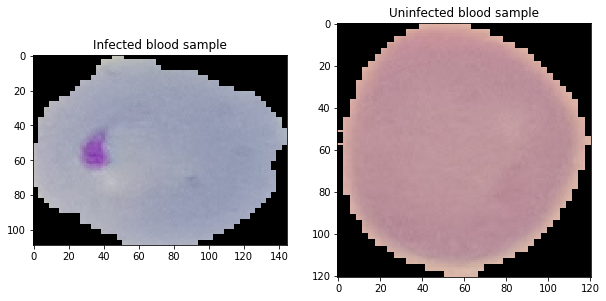

In [13]:
plt.figure(figsize=(10,8))

plt.subplot(1, 2, 1)
infected1 = cv2.imread('/home/enock/Documents/Tensorflow_Keras_projects/cell_images/Parasitized/infected1.png')
infected1 = cv2.cvtColor(infected1, cv2.COLOR_BGR2RGB)
plt.title('Infected blood sample')
plt.imshow(infected1)

plt.subplot(1, 2, 2)
uninfected1 = cv2.imread('/home/enock/Documents/Tensorflow_Keras_projects/cell_images/Uninfected/uninfected1.png')
uninfected1 = cv2.cvtColor(uninfected1, cv2.COLOR_BGR2RGB)
plt.title('Uninfected blood sample')
plt.imshow(uninfected1)

### Data Augmentation
Augment only the training data

In [16]:
batch_size = 128
epochs = 30

In [17]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1/255.0,
    rotation_range=40,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [18]:
train_img = train_gen.flow_from_directory(
    train_dir,
    target_size=(70, 70),
    classes=['infected', 'uninfected'],
    batch_size=batch_size,
    shuffle=True,
    color_mode='rgb',
    class_mode='binary')

Found 19842 images belonging to 2 classes.


In [20]:
validation_gen = ImageDataGenerator(
    preprocessing_function= preprocess_input,
    rescale=1/255.0)

In [21]:
validation_img = validation_gen.flow_from_directory(
    validation_dir,
    target_size=(70, 70),
    color_mode="rgb",
    classes=['infected', 'uninfected'],
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary')

Found 2204 images belonging to 2 classes.


In [22]:
# print('Classes: ', validation_img.classes)
# print('Class indices: ', validation_img.class_indices)
# print('Class mode: ', validation_img.class_mode)
# print('Samples: ', validation_img.samples)

Classes:  [0 0 0 ... 1 1 1]
Class indices:  {'infected': 0, 'uninfected': 1}
Class mode:  binary
Samples:  2204


### Build and Train Model

#### Instantiate pre-trained model base

In [23]:
pmodel = NASNetMobile(include_top=False, weights='imagenet',input_shape=(70, 70, 3))

#### Add a dense layer to the pre-trained model base

In [24]:
cmodel = pmodel.output
cmodel = Flatten()(cmodel)
cmodel = Dropout(0.2)(cmodel)
cmodel = Dense(512, activation='relu')(cmodel)
cmodel = BatchNormalization()(cmodel)
cmodel = Dropout(0.2)(cmodel)
cmodel = Dense(1, activation='sigmoid')(cmodel)

model = Model(inputs=pmodel.input, outputs=cmodel)

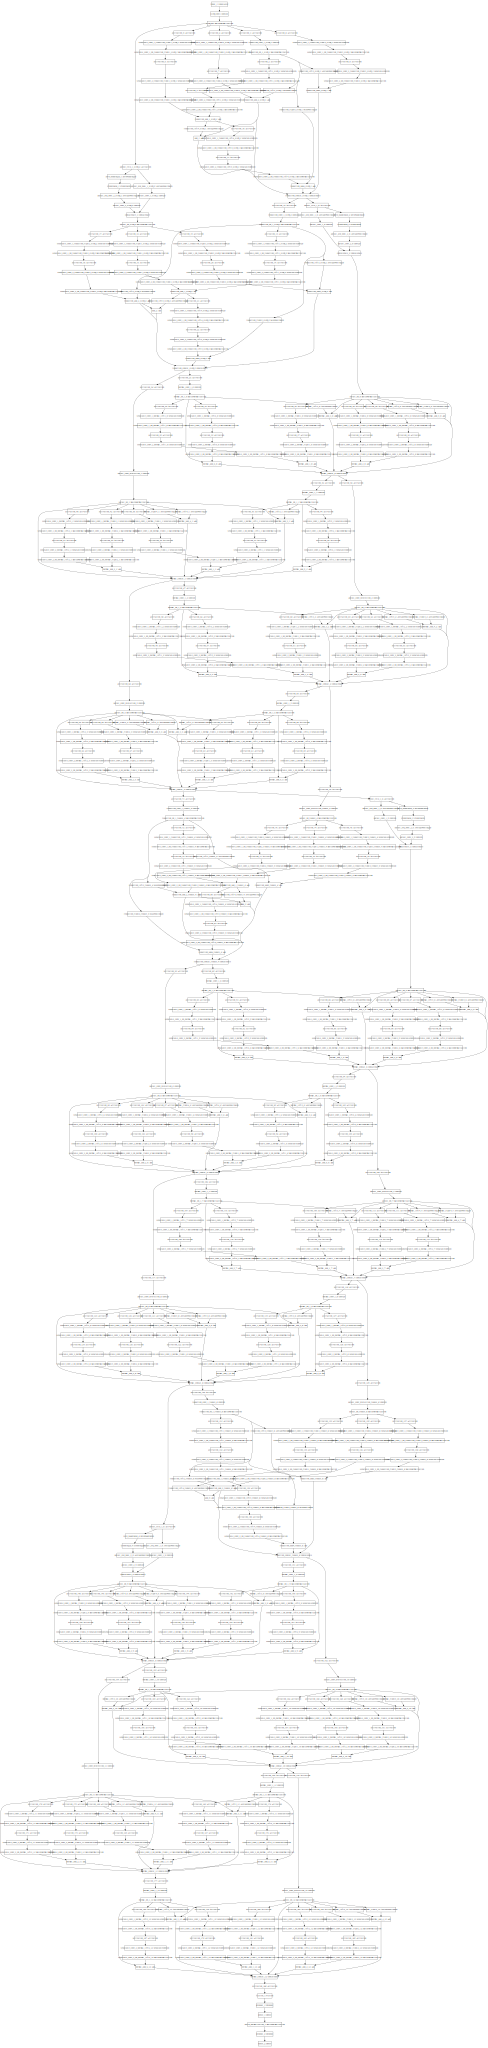

In [25]:
#### View network structure
SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### Fine-tune

In [26]:
for layer in pmodel.layers[15:]:
    layer.trainable = True

#### learning schedule

#### Callbacks for learning rate adjustment

In [27]:
# model_path = './malari_classifier.h5'


# checkpoint = ModelCheckpoint(model_path,
#                 monitor='binary_accuracy', 
#                 save_best_only=True, 
#                 verbose=1)


scheduler = SGDRScheduler(min_lr=1e-5,
                          max_lr=1e-2,
                          steps_per_epoch=np.ceil(epochs/batch_size),
                          lr_decay=0.9,
                          cycle_length=5,
                          mult_factor=1.5)

# clr_triangular = CyclicLR(mode='exp_range', step_size=np.ceil(epochs/batch_size), gamma=0.9994)

# clr = lambda x: 0.5*(1+np.sin(x*np.pi/2.))
# clr_triangular_ = CyclicLR(scale_fn=clr, scale_mode='cycle', step_size=np.ceil(epochs/batch_size))

# callbacks = [checkpoint, scheduler, clr_triangular_, clr_triangular]

#### Compile model

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.05, momentum=0.9, decay=0.0005),
              metrics=['binary_accuracy'])

#### Model fit

In [31]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

print("[INFO] trainiing the model...")
history = model.fit_generator(
    train_img,
    steps_per_epoch=train_img.samples//batch_size,
    validation_data=validation_img,
    validation_steps=validation_img.samples//batch_size,
    epochs=epochs,
    callbacks= [scheduler],
    workers=8,
    verbose=1
    )

[INFO] trainiing the model...
Epoch 1/30
155/155 [==============================] - 512s 3s/step - loss: 0.2572 - binary_accuracy: 0.9055 - val_loss: 0.3106 - val_binary_accuracy: 0.8680
Epoch 2/30
155/155 [==============================] - 460s 3s/step - loss: 0.1450 - binary_accuracy: 0.9497 - val_loss: 0.1555 - val_binary_accuracy: 0.9492
Epoch 3/30
155/155 [==============================] - 461s 3s/step - loss: 0.1812 - binary_accuracy: 0.9320 - val_loss: 1.7605 - val_binary_accuracy: 0.5000
Epoch 4/30
155/155 [==============================] - 460s 3s/step - loss: 0.1529 - binary_accuracy: 0.9473 - val_loss: 0.5204 - val_binary_accuracy: 0.6996
Epoch 5/30
155/155 [==============================] - 460s 3s/step - loss: 0.1331 - binary_accuracy: 0.9522 - val_loss: 0.3054 - val_binary_accuracy: 0.9106
Epoch 6/30
155/155 [==============================] - 459s 3s/step - loss: 0.1532 - binary_accuracy: 0.9508 - val_loss: 0.1725 - val_binary_accuracy: 0.9510
Epoch 7/30
155/155 [========

In [80]:
# model.save('malaria_nasnetmobile.h5')

### Evaluate on test data

In [81]:
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1./255)

In [82]:
test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(70, 70),
    color_mode="rgb",
    batch_size=32,
    interpolation='bicubic',
    shuffle=False,
    class_mode='binary')

Found 5512 images belonging to 2 classes.


#### Print model accuracy 

In [83]:
test_loss, test_acc = model.evaluate_generator(
        test_generator,
        steps=test_generator.samples//128,
        verbose=1)

43/43 [==============================] - 13s 312ms/step


In [84]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)
print("Baseline Error: %.2f%%" % (100-test_acc*100))

test_loss: 0.058674078434705734
test_acc: 0.9774709302325582
Baseline Error: 2.25%
